In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
# Charger le modèle entraîné
MODEL_PATH = "../models/final_model.keras"
print("Chargement du modèle...")
model = load_model(MODEL_PATH)
print("Modèle chargé avec succès.")

# Classes des tumeurs
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
print("Classes:", class_names)


Chargement du modèle...
Modèle chargé avec succès.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


c:\Users\HP\Desktop\brain-tumor-classification\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
def preprocess_image(image_path):
    """
    Prétraiter l'image avant de la passer au modèle.
    Args:
        image_path (str): Chemin de l'image
    Returns:
        np.ndarray: Image prétraitée prête pour la prédiction
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Erreur : Image introuvable. Vérifiez le chemin.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en RGB
    img = cv2.resize(img, (128, 128))  # Redimensionner en (128, 128)
    img = img / 255.0  # Normaliser entre [0, 1]
    img = np.expand_dims(img, axis=0)  # Ajouter une dimension batch
    return img

def display_image(image_path):
    """
    Afficher l'image avec matplotlib.
    Args:
        image_path (str): Chemin de l'image
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image chargée")
    plt.show()


In [4]:
def predict_image(image_path):
    """
    Prédire la classe d'une image.
    Args:
        image_path (str): Chemin de l'image
    """
    try:
        print("Prétraitement de l'image...")
        img = preprocess_image(image_path)
        
        # Afficher l'image
        display_image(image_path)
        
        # Faire la prédiction
        print("Prédiction en cours...")
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions)
        
        # Afficher les résultats
        print(f"Classe prédite : {class_names[predicted_class]}")
        print(f"Confiance : {confidence:.2f}")
    except Exception as e:
        print(f"Erreur : {e}")


Prétraitement de l'image...


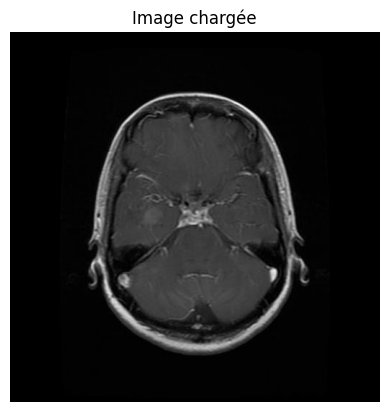

Prédiction en cours...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Classe prédite : glioma
Confiance : 1.00


In [5]:
# Entrer le chemin de l'image
image_path = input("Entrez le chemin de l'image à prédire : ")

# Vérification du chemin
if os.path.exists(image_path):
    predict_image(image_path)
else:
    print("Erreur : Le chemin spécifié n'existe pas.")